# Classification Exercise:

Es tu momento. En la carpeta data tienes un dataset con las características de distintas setas y si son venenosas o comestibles. Realiza el preprocesamiento pertinente, separa el dataset como convenga y prueba con un par de modelos hasta encontrar uno que nos de buenos resultados. Recuerda que una falta de complejidad del modelo puede desembocar en un modelo con _underfit_, (scorings muy bajos, sobre el _60%_ o menos) y un exceso puede llevarnos al _overfit_ (scorings del 100%).

Una vez obtengas un resultado que te parezca bueno representa los mismos mediante una matriz de confunsión.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
path_file = "/content/drive/MyDrive/Machine_learning/Clasificacion/data/pets.csv"
df = pd.read_csv(path_file)

# 1.Data analysis and data cleaning

In [75]:
df.head()

,ID,Type,Weight,Age,Height,Has_Vaccination,Color,Has_Disease,Breed,Activity_Level,Gender,Diet,Sterilized,Medical_History
0,1,Dog,32.483571,9.0,80.990332,True,Golden,True,Labrador,Medium,NaN,Wet,True,2.0
1,2,Cat,9.585207,5.0,29.623168,True,Black,False,Maine Coon,High,Female,Mixed,False,4.0
2,3,Dog,33.238443,2.0,60.894456,False,White,True,Bulldog,Low,Male,Mixed,True,4.0
3,4,Dog,37.615149,8.0,50.295948,True,Brown,True,Beagle,Low,Male,Wet,False,5.0
4,5,Dog,NaN,5.0,70.473350,True,NaN,False,Bulldog,High,Male,Wet,False,5.0


Lo primero que haremos será identificar cual es nuetro feature, es decir, cual es nuestra variable objetivo. En este caso, la variable objetivo es el `Type`

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               500 non-null    int64  
 1   Type             500 non-null    object 
 2   Weight           476 non-null    float64
 3   Age              475 non-null    float64
 4   Height           476 non-null    float64
 5   Has_Vaccination  477 non-null    object 
 6   Color            475 non-null    object 
 7   Has_Disease      476 non-null    object 
 8   Breed            475 non-null    object 
 9   Activity_Level   475 non-null    object 
 10  Gender           477 non-null    object 
 11  Diet             476 non-null    object 
 12  Sterilized       476 non-null    object 
 13  Medical_History  475 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 54.8+ KB


In [77]:
df.isnull().sum()

ID                  0
Type                0
Weight             24
Age                25
Height             24
Has_Vaccination    23
Color              25
Has_Disease        24
Breed              25
Activity_Level     25
Gender             23
Diet               24
Sterilized         24
Medical_History    25
dtype: int64

In [78]:
df.set_index("ID", inplace = True)

In [79]:
df["Type"].unique()

array(['Dog', 'Cat'], dtype=object)

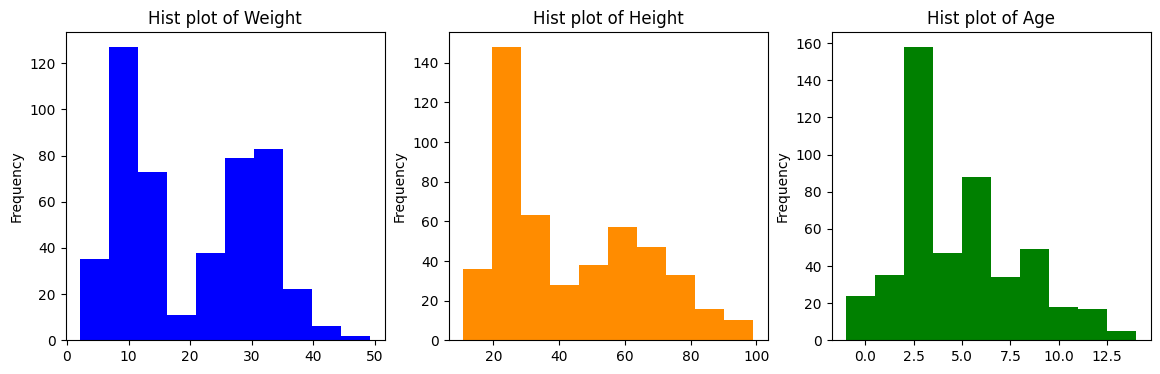

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

df['Weight'].plot(kind="hist", ax=axs[0], color = "blue")
axs[0].set_title('Hist plot of Weight')


df['Height'].plot(kind="hist", ax=axs[1], color = "darkorange")
axs[1].set_title('Hist plot of Height')

df['Age'].plot(kind="hist", ax=axs[2],  color = "green")
axs[2].set_title('Hist plot of Age')

plt.show()

## 1.1 Numerical variables. Weight, Age, Height.

In [81]:
mean_dog_weight = df[df['Type'] == 'Dog']['Weight'].mean()
mean_dog_age = df[df['Type'] == 'Dog']['Age'].mean()
mean_dog_height = df[df['Type'] == 'Dog']['Height'].mean()

mean_cat_weight = df[df['Type'] == 'Cat']['Weight'].mean()
mean_cat_age = df[df['Type'] == 'Cat']['Age'].mean()
mean_cat_height = df[df['Type'] == 'Cat']['Height'].mean()

In [82]:
mask_dog = df['Type'] == 'Dog'
mask_cat = df['Type'] == 'Cat'

In [83]:
df.loc[mask_dog, 'Weight'] = df.loc[mask_dog, 'Weight'].fillna(mean_dog_weight)
df.loc[mask_dog, 'Age'] = df.loc[mask_dog, 'Age'].fillna(mean_dog_age)
df.loc[mask_dog, 'Height'] = df.loc[mask_dog, 'Height'].fillna(mean_dog_height)

df.loc[mask_cat, 'Weight'] = df.loc[mask_cat, 'Weight'].fillna(mean_cat_weight)
df.loc[mask_cat, 'Age'] = df.loc[mask_cat, 'Age'].fillna(mean_cat_age)
df.loc[mask_cat, 'Height'] = df.loc[mask_cat, 'Height'].fillna(mean_cat_height)

In [84]:
df.isnull().sum()

Type                0
Weight              0
Age                 0
Height              0
Has_Vaccination    23
Color              25
Has_Disease        24
Breed              25
Activity_Level     25
Gender             23
Diet               24
Sterilized         24
Medical_History    25
dtype: int64

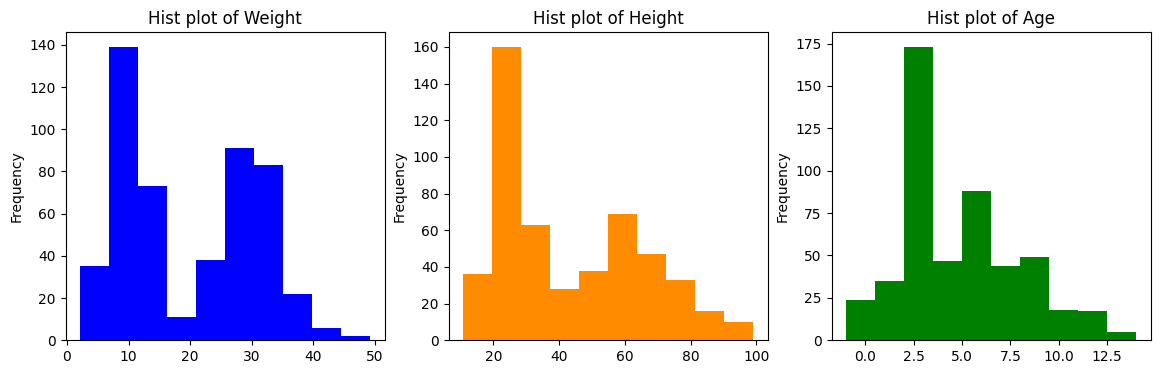

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

df['Weight'].plot(kind="hist", ax=axs[0], color = "blue")
axs[0].set_title('Hist plot of Weight')


df['Height'].plot(kind="hist", ax=axs[1], color = "darkorange")
axs[1].set_title('Hist plot of Height')

df['Age'].plot(kind="hist", ax=axs[2],  color = "green")
axs[2].set_title('Hist plot of Age')

plt.show()

### Comprobamos si hay outliers

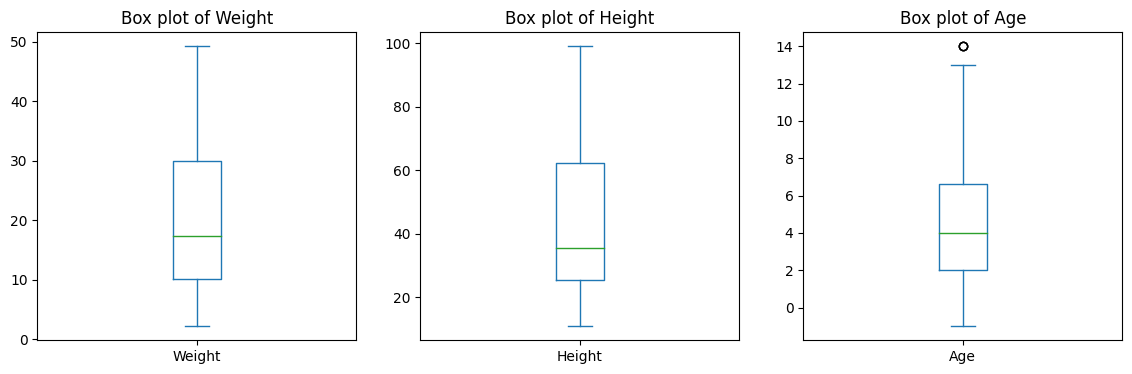

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

df['Weight'].plot(kind="box", ax=axs[0])
axs[0].set_title('Box plot of Weight')


df['Height'].plot(kind="box", ax=axs[1])
axs[1].set_title('Box plot of Height')

df['Age'].plot(kind="box", ax=axs[2])
axs[2].set_title('Box plot of Age')

plt.show()

In [87]:
q1_age = df["Age"].quantile(.25)
q3_age = df["Age"].quantile(.75)

IQR = q3_age - q1_age

age_outliers_mask = (df["Age"] > q1_age - 1.5*IQR) & (df["Age"] < q3_age + 1.5*IQR)

In [88]:
df = df[age_outliers_mask]

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 1 to 500
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             497 non-null    object 
 1   Weight           497 non-null    float64
 2   Age              497 non-null    float64
 3   Height           497 non-null    float64
 4   Has_Vaccination  474 non-null    object 
 5   Color            472 non-null    object 
 6   Has_Disease      473 non-null    object 
 7   Breed            472 non-null    object 
 8   Activity_Level   472 non-null    object 
 9   Gender           474 non-null    object 
 10  Diet             473 non-null    object 
 11  Sterilized       473 non-null    object 
 12  Medical_History  473 non-null    float64
dtypes: float64(4), object(9)
memory usage: 54.4+ KB


### Sacaling de las variables numericas

- Vamos a usar la estandarización min/max para resolver este problema

In [90]:
weight_min = df["Weight"].min()
weight_max = df["Weight"].max()

df["Weight"] = (df["Weight"]- weight_min)/(weight_max - weight_min)

<ipython-input-90-afd5d446aca1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Weight"] = (df["Weight"]- weight_min)/(weight_max - weight_min)


In [91]:
height_min = df["Height"].min()
height_max = df["Height"].max()

df["Height"] = (df["Height"]- height_min)/(height_max - height_min)

<ipython-input-91-c41061dfd7bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Height"] = (df["Height"]- height_min)/(height_max - height_min)


In [92]:
age_min = df["Age"].min()
age_max = df["Age"].max()

df["Age"] = (df["Age"]- age_min)/(age_max - age_min)

<ipython-input-92-616931167eeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = (df["Age"]- age_min)/(age_max - age_min)


In [93]:
df.head()

,Type,Weight,Age,Height,Has_Vaccination,Color,Has_Disease,Breed,Activity_Level,Gender,Diet,Sterilized,Medical_History
ID,,,,,,,,,,,,,
1,Dog,0.643908,0.714286,0.795680,True,Golden,True,Labrador,Medium,NaN,Wet,True,2.0
2,Cat,0.157979,0.428571,0.213734,True,Black,False,Maine Coon,High,Female,Mixed,False,4.0
3,Dog,0.659927,0.214286,0.568011,False,White,True,Bulldog,Low,Male,Mixed,True,4.0
4,Dog,0.752806,0.642857,0.447939,True,Brown,True,Beagle,Low,Male,Wet,False,5.0
5,Dog,0.590418,0.428571,0.676532,True,NaN,False,Bulldog,High,Male,Wet,False,5.0


## 1.2 Object variables (strings)

## Working on NaN values

In [94]:
df["Color"].unique()

array(['Golden', 'Black', 'White', 'Brown', nan], dtype=object)

In [95]:
df["Color"] = df["Color"].fillna(df["Color"].mode()[0])

- En este caso, como en el resto de los que quedan hasta que acabaemos con el preprocesamiento, también podríamos diferenciar entre perros y gatos, pero no vamos a hacerlo para no aumentar la complejidad del problema

## Encoding of the objects data

In [96]:
df_colors = pd.get_dummies(df["Color"]).astype("int").drop("White", axis=1)

In [97]:
df = df.drop("Color", axis=1)

In [98]:
pd.concat([df, df_colors], axis = 1)

,Type,Weight,Age,Height,Has_Vaccination,Has_Disease,Breed,Activity_Level,Gender,Diet,Sterilized,Medical_History,Black,Brown,Golden
ID,,,,,,,,,,,,,,,
1,Dog,0.643908,0.714286,0.795680,True,True,Labrador,Medium,NaN,Wet,True,2.0,0,0,1
2,Cat,0.157979,0.428571,0.213734,True,False,Maine Coon,High,Female,Mixed,False,4.0,1,0,0
3,Dog,0.659927,0.214286,0.568011,False,True,Bulldog,Low,Male,Mixed,True,4.0,0,0,0
4,Dog,0.752806,0.642857,0.447939,True,True,Beagle,Low,Male,Wet,False,5.0,0,1,0
5,Dog,0.590418,0.428571,0.676532,True,False,Bulldog,High,Male,Wet,False,5.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Dog,0.648385,0.500000,0.898787,True,True,Beagle,Low,Male,NaN,False,3.0,0,0,0
497,Cat,0.167116,0.428571,0.278133,True,NaN,Maine Coon,Medium,Female,Dry,True,4.0,0,0,0
498,Dog,0.590418,0.642857,0.763224,False,False,Bulldog,High,Female,Mixed,True,3.0,1,0,0


## Doing the same process for the other object data

In [99]:
df.isnull().sum()

Type                0
Weight              0
Age                 0
Height              0
Has_Vaccination    23
Has_Disease        24
Breed              25
Activity_Level     25
Gender             23
Diet               24
Sterilized         24
Medical_History    24
dtype: int64

In [100]:
df["Has_Vaccination"] = df["Has_Vaccination"].fillna(df["Has_Vaccination"].mode()[0])

In [101]:
df["Has_Vaccination"] = df["Has_Vaccination"].astype(int)

In [102]:
df["Has_Disease"] = df["Has_Disease"].fillna(df["Has_Disease"].mode()[0])

In [103]:
df["Has_Disease"] = df["Has_Disease"].astype(int)

In [104]:
df.drop("Breed", axis = 1, inplace = True)

In [105]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [106]:
df["Gender"] = pd.get_dummies(df["Gender"]).drop("Male", axis=1).astype(int)

In [107]:
df.rename(columns = {"Gender":"Female"}, inplace = True)

In [108]:
df.sample(5)

,Type,Weight,Age,Height,Has_Vaccination,Has_Disease,Activity_Level,Female,Diet,Sterilized,Medical_History
ID,,,,,,,,,,,
347,Cat,0.074592,0.285714,0.016689,0,0,High,1,Mixed,False,3.0
365,Cat,0.210719,0.214286,0.229138,0,0,Low,1,Wet,True,5.0
369,Cat,0.173000,0.285714,0.136248,1,1,High,0,Dry,False,1.0
364,Dog,0.633828,0.928571,0.392517,1,0,High,1,Wet,False,5.0
280,Cat,0.142251,0.285714,0.143848,1,1,High,1,Dry,False,5.0


In [109]:
df["Activity_Level"] = df["Activity_Level"].fillna(df["Activity_Level"].mode()[0])

In [110]:
df["Activity_Level"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [111]:
dummies = pd.get_dummies(df["Activity_Level"]).drop("Medium", axis=1).astype(int)

In [112]:
df = pd.concat([df, dummies], axis = 1).drop("Activity_Level", axis = 1)

In [113]:
df.isnull().sum()

Type                0
Weight              0
Age                 0
Height              0
Has_Vaccination     0
Has_Disease         0
Female              0
Diet               24
Sterilized         24
Medical_History    24
High                0
Low                 0
dtype: int64

In [114]:
df["Diet"] = df["Diet"].fillna(df["Diet"].mode()[0])
dummies = pd.get_dummies(df["Diet"]).drop("Wet", axis=1).astype(int)
df = pd.concat([df, dummies], axis = 1).drop("Diet", axis = 1)

In [115]:
df["Sterilized"] = df["Sterilized"].fillna(df["Sterilized"].mode()[0])
df["Sterilized"] = df["Sterilized"].astype(int)

In [116]:
df["Medical_History"] = df["Medical_History"].fillna(df["Medical_History"].mean())

In [117]:
q1_med_hist = df["Medical_History"].quantile(.25)
q3_med_hist = df["Medical_History"].quantile(.75)

IQR = q3_med_hist - q1_med_hist

med_hist_outliers_mask = (df["Medical_History"] > q1_med_hist - 1.5*IQR) & (df["Medical_History"] < q3_med_hist + 1.5*IQR)

In [118]:
df = df[med_hist_outliers_mask]

In [119]:
med_hist_min = df["Medical_History"].min()
med_hist_max = df["Medical_History"].max()

df["Medical_History"] = (df["Medical_History"]- med_hist_min)/(med_hist_max - med_hist_min)

In [120]:
df.sample(5)

,Type,Weight,Age,Height,Has_Vaccination,Has_Disease,Female,Sterilized,Medical_History,High,Low,Dry,Mixed
ID,,,,,,,,,,,,,
17,Cat,0.102301,0.251976,0.124458,1,1,1,1,0.0,0,1,1,0
174,Dog,0.627402,0.428571,0.547241,1,0,1,1,1.0,0,1,1,0
150,Cat,0.185689,0.357143,0.113381,0,0,0,1,0.8,0,0,0,0
393,Dog,0.451120,0.785714,0.900027,0,0,0,0,0.6,1,0,0,1
445,Cat,0.083735,0.428571,0.183998,0,1,1,0,0.6,1,0,0,0


In [121]:
df.isnull().sum()

Type               0
Weight             0
Age                0
Height             0
Has_Vaccination    0
Has_Disease        0
Female             0
Sterilized         0
Medical_History    0
High               0
Low                0
Dry                0
Mixed              0
dtype: int64

# 2.Classification ML model

In [122]:
df_X = df.drop("Type", axis = 1)

In [123]:
df_y = df["Type"]

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
decision_tree = DecisionTreeClassifier(max_depth=1, min_samples_split = 4)
# min_samples_split es el mínimo número de elementos que tiene que tener cada partición.Se utiliza para que el modelo no se vuelva loco haciendo las particiones

In [138]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_samples_split=4)

In [139]:
y_predict = decision_tree.predict(X_test)

y_predict

array(['Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog',
       'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog',
       'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat',
       'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog',
       'Dog', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Dog',
       'Cat', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Dog',
       'Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat',
       'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog',
       'Dog', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat',
       'Dog', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog',
       'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat',
       'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog',
       'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat',
       'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog',
       'Dog', 'Dog',

In [141]:
decision_tree.score(X_test, y_test)

1.0

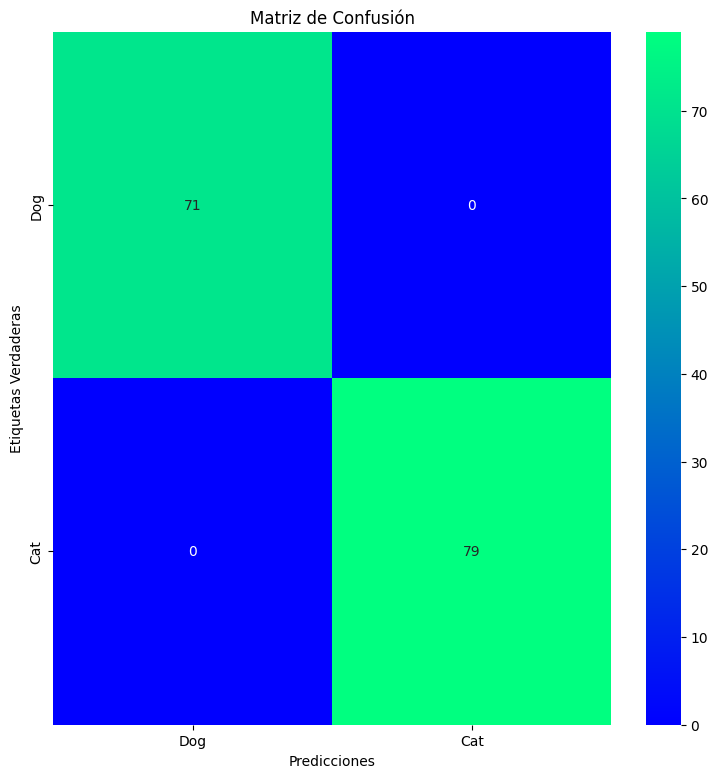

In [146]:
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="winter", xticklabels=["Dog", "Cat"], yticklabels=["Dog", "Cat"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()